In [1]:
!pip install tweet-preprocessor

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [71]:
import pandas as pd
import numpy as np
from numpy import load
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import preprocessor as p
from nltk.tokenize import word_tokenize 
from numpy import save
from sklearn import preprocessing


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train_path = '/content/drive/My Drive/AAAI CONSTRAINT/Fake News/Constraint_English_Train - Sheet1.csv'
val_path = '/content/drive/My Drive/AAAI CONSTRAINT/Fake News/Constraint_English_Val - Sheet1.csv'

In [5]:
train_df = pd.read_csv(train_path)
print(len(train_df))
train_df.head()

6420


,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [6]:
val_df = pd.read_csv(val_path)
print(len(val_df))
val_df.head()

2140


,id,tweet,label
0,1,Chinese converting to Islam after realising th...,fake
1,2,11 out of 13 people (from the Diamond Princess...,fake
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus A...",fake
3,4,Mike Pence in RNC speech praises Donald Trump’...,fake
4,5,6/10 Sky's @EdConwaySky explains the latest #C...,real


In [7]:
def subst(s):
    s = s.replace('theres','there is')
    s = s.replace('didnt','did not')
    s = s.replace("didn't",'did not')
    s = s.replace('havent','have not')
    s = s.replace("aren't",'are not')
    s = s.replace("haven't",'have not')
    s = s.replace('hasnt','has not')
    s = s.replace("hasn't",'has not')
    s = s.replace('couldnt','could not')
    s = s.replace("couldn't",'could not')
    s = s.replace("We'd ",'We would ')
    s = s.replace("we'd ",'we would ')
    s = s.replace("I'd",'I would')
    s = s.replace('cant','can not')
    s = s.replace("can't", 'can not')
    s = s.replace('cannot','can not')
    s = s.replace('Im ','I am ')
    s = s.replace("I've ",'I have ')
    s = s.replace("i've ",'I have ')
    s = s.replace("I'm ",'I am ')
    s = s.replace("isnt",'Is not')
    s = s.replace("isn't",'Is not')    
    s = s.replace('wont','will not')
    s = s.replace("won't",'will not')
    s = s.replace('dont','do not')
    s = s.replace("don't",'do not')
    s = s.replace('doesnt','does not')
    s = s.replace("doesn't",'does not')
    return s

In [8]:
tweets = train_df.tweet.values
val_tweets = val_df.tweet.values
print(tweets)
for i in range(len(tweets)):
  if tweets[i]:
    tweets[i] = subst(tweets[i])
for i in range(len(val_tweets)):
  val_tweets[i] = subst(val_tweets[i])


['The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.'
 'States reported 1121 deaths a small rise from last Tuesday. Southern states reported 640 of those deaths. https://t.co/YASGRTT4ux'
 'Politically Correct Woman (Almost) Uses Pandemic as Excuse Not to Reuse Plastic Bag https://t.co/thF8GuNFPe #coronavirus #nashville'
 ...
 '_A post claims a COVID-19 vaccine has already been developed and will cause widespread infertility._'
 'Aamir Khan Donate 250 Cr. In PM Relief Cares Fund'
 'It has been 93 days since the last case of COVID-19 was acquired locally from an unknown source. The total number of active cases of COVID-19 in New Zealand’s managed isolation and quarantine facilities is now 25.']


In [9]:
clean_tweets = [p.tokenize(tweet) for tweet in tweets ]
clean_tweets = [x.replace('$','') for x in clean_tweets]
val_clean_tweets = [p.tokenize(tweet) for tweet in val_tweets ]
val_clean_tweets = [x.replace('$','') for x in val_clean_tweets]
print(clean_tweets)

tokens = [word_tokenize(tweet) for tweet in clean_tweets]
val_tokens = [word_tokenize(tweet) for tweet in val_clean_tweets]
print(tokens[:20])

['The CDC currently reports NUMBER deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly NUMBER people today.', 'States reported NUMBER deaths a small rise from last Tuesday. Southern states reported NUMBER of those deaths. URL', 'Politically Correct Woman (Almost) Uses Pandemic as Excuse Not to Reuse Plastic Bag URL HASHTAG HASHTAG', 'HASHTAG: We have NUMBER HASHTAG testing laboratories in India and as on NUMBERth August NUMBER NUMBER tests have been done : MENTION DG MENTION HASHTAG HASHTAG URL', 'Populous states can generate large case counts but if you look at the new cases per million today NUMBER smaller states are showing more cases per million than California or Texas: AL AR ID KS KY LA MS NV and SC. URL', 'Covid Act Now found "on average each person in Illinois with COVID-19 is infecting NUMBER other people. Data shows that the infection growth rate has declined over time this factors in the st

In [10]:
len(tokens)

6420

In [11]:
labels = train_df.label.values
val_labels = val_df.label.values
print(labels[:20])
train_Y = []
val_Y = []
for x in labels:
  if x == 'real':
    train_Y.append(1)
  else:
    train_Y.append(0)
for x in val_labels:
  if x == 'real':
    val_Y.append(1)
  else:
    val_Y.append(0)

['real' 'real' 'fake' 'real' 'real' 'real' 'real' 'fake' 'fake' 'fake'
 'real' 'fake' 'real' 'real' 'real' 'real' 'fake' 'real' 'real' 'fake']


In [12]:
data = {}
items = ['URL','MENTION','HASHTAG','RESERVED','EMOJI','SMILEY','NUMBER']
data['0'] = {}
data['1'] = {}
for item in items:
  data['0'][item] = []
  data['1'][item] = []

print()
for i in range(len(clean_tweets)):
  for item in items:
    data[str(train_Y[i])][item].append(clean_tweets[i].count(item))
print(data['0']['HASHTAG'][:100])
print(data['1']['HASHTAG'][:100])

print(np.mean(data['0']['HASHTAG']))
print(len(data['0']['HASHTAG']),len(data['0']['HASHTAG'])-data['0']['HASHTAG'].count(0),len(data['0']['URL'])-data['0']['URL'].count(0),len(data['0']['EMOJI'])-data['0']['EMOJI'].count(0))

print(np.mean(data['1']['HASHTAG']))
print(len(data['1']['HASHTAG']),len(data['1']['HASHTAG'])-data['1']['HASHTAG'].count(0),len(data['1']['URL'])-data['1']['URL'].count(0),len(data['1']['EMOJI'])-data['1']['EMOJI'].count(0))



[2, 0, 0, 0, 0, 0, 0, 1, 1, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 0]
[0, 0, 4, 0, 0, 1, 1, 1, 3, 1, 13, 2, 0, 0, 1, 1, 0, 0, 2, 2, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 4, 1, 1, 1, 11, 1, 1, 0, 3, 3, 12, 0, 0, 1, 0, 3, 1, 0, 3, 0, 0, 5, 3, 0, 1, 0, 0, 0, 0, 3, 2, 10, 1, 1, 4, 0, 3, 0, 0, 3, 2, 1, 1, 0, 6, 0, 2, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 4, 6, 2, 0, 0, 1, 0, 2, 1, 1]
0.5091503267973856
3060 573 1001 34
1.0738095238095238
3360 1714 2325 272


In [ ]:
stat = {}
for item in items:
  stat[item] = []

  c0 = [x for x in data['0'][item] if x != 0]
  c1 = [x for x in data['1'][item] if x != 0]
  stat[item].append((len(c0),len(data['0'][item]),np.mean(c0)))
  stat[item].append((len(c1),len(data['1'][item]),np.mean(c1)))


print(stat)

{'URL': [(1001, 3060, 1.2527472527472527), (2325, 3360, 1.3505376344086022)], 'MENTION': [(239, 3060, 2.410041841004184), (937, 3360, 1.7107790821771611)], 'HASHTAG': [(573, 3060, 2.719022687609075), (1714, 3360, 2.105017502917153)], 'RESERVED': [(19, 3060, 1.0), (245, 3360, 1.0)], 'EMOJI': [(34, 3060, 2.2058823529411766), (272, 3360, 2.6286764705882355)], 'SMILEY': [(3, 3060, 1.0), (2, 3360, 1.0)], 'NUMBER': [(657, 3060, 1.552511415525114), (1990, 3360, 2.812060301507538)]}


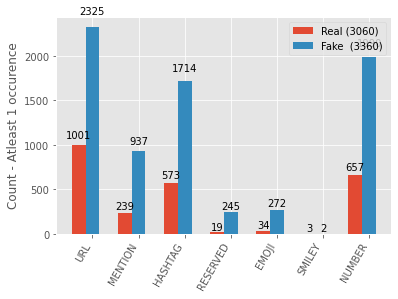

In [ ]:
ind = np.arange(len(stat.keys()))
width = 0.3

fig = plt.figure()
ax = fig.add_subplot(111)


c0 = [stat[i][0][0] for i in stat]
rects1 = ax.bar(ind, c0, width, )

c1 = [stat[i][1][0] for i in stat]
rects2 = ax.bar(ind+width, c1, width, )


ax.set_ylabel('Count - Atleast 1 occurence')
ax.set_xticks(ind+width)

ax.set_xticklabels( tuple(stat.keys()) )
ax.legend( (rects1[0], rects2[0]), ('Real (%d)'%stat['HASHTAG'][0][1],'Fake  (%d)'%stat['HASHTAG'][1][1]) )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)
plt.xticks(rotation=60,ha='right')
plt.show()

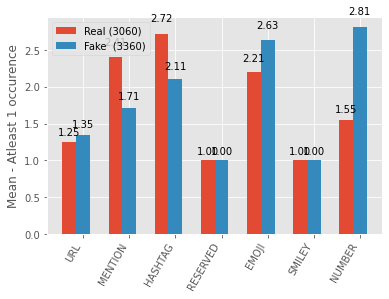

In [ ]:
ind = np.arange(len(stat.keys()))
width = 0.3

fig = plt.figure()
ax = fig.add_subplot(111)


c0 = [stat[i][0][2] for i in stat]
rects1 = ax.bar(ind, c0, width, )

c1 = [stat[i][1][2] for i in stat]
rects2 = ax.bar(ind+width, c1, width, )


ax.set_ylabel('Mean - Atleast 1 occurence')
ax.set_xticks(ind+width)

ax.set_xticklabels( tuple(stat.keys()) )
ax.legend( (rects1[0], rects2[0]), ('Real (%d)'%stat['HASHTAG'][0][1],'Fake  (%d)'%stat['HASHTAG'][1][1]) )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%.2f'%(h),
                ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)
plt.xticks(rotation=60,ha='right')
plt.show()

In [ ]:
tuple(stat.keys())

('URL', 'MENTION', 'HASHTAG', 'RESERVED', 'EMOJI', 'SMILEY', 'NUMBER')

In [66]:
train_X = load('/content/drive/My Drive/Dataset-FakeNews/train_X.npy')
train_X = np.array(train_X)
val_X = load('/content/drive/My Drive/Dataset-FakeNews/val_X.npy')
val_X = np.array(val_X)

In [67]:
data = {}
items = ['URL','MENTION','HASHTAG','RESERVED','EMOJI','SMILEY','NUMBER']
for item in items:
  data[item] = []
  data[item] = []

print()
for i in range(len(clean_tweets)):
  for item in items:
    data[item].append(clean_tweets[i].count(item))


print(len(data['HASHTAG']))
print(data)

arr = []

for item in items:
  arr.append(data[item])

arr = np.array(arr)
arr = arr.T
print(arr.shape)


6420
{'URL': [0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 2, 2, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 1, 2, 1, 1, 0, 0, 1, 0, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1, 1, 2, 0, 0, 1, 0, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 2, 1, 2, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 1, 2, 2, 1, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0, 2, 0, 2, 1, 1, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 2, 2, 0, 1, 0, 0, 0, 2, 2, 0, 1, 1, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 2, 0, 1

In [69]:
print(train_X.shape)
print(arr.shape)
train_X_new = np.concatenate((train_X,arr),axis=1)
print(train_X_new.shape)
print(train_X_new.T[300][:100])


(6420, 300)
(6420, 7)
(6420, 307)
[0. 1. 1. 1. 1. 1. 2. 1. 0. 1. 2. 2. 2. 0. 2. 1. 0. 0. 2. 0. 2. 0. 0. 0.
 1. 1. 0. 0. 0. 2. 2. 0. 2. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 2. 1. 1. 1. 0.
 0. 1. 2. 1. 1. 0. 0. 1. 0. 1. 2. 0. 2. 2. 0. 0. 1. 0. 0. 0. 1. 0. 0. 2.
 1. 0. 0. 0. 2. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 2. 0. 1. 0. 0.
 1. 0. 0. 0.]


In [68]:
val_data = {}
items = ['URL','MENTION','HASHTAG','RESERVED','EMOJI','SMILEY','NUMBER']
for item in items:
  val_data[item] = []
  val_data[item] = []

print()
for i in range(len(val_clean_tweets)):
  for item in items:
    val_data[item].append(val_clean_tweets[i].count(item))


print(len(val_data['HASHTAG']))
print(val_data)

val_arr = []

for item in items:
  val_arr.append(val_data[item])

val_arr = np.array(val_arr)
val_arr = val_arr.T
print(val_arr.shape)


2140
{'URL': [0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0, 2, 1, 1, 2, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 2, 2, 0, 2, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 2, 1, 0, 2, 2, 0, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 1, 1

In [62]:
print(val_X.shape)
print(val_arr.shape)
val_X_new = np.concatenate((val_X,val_arr),axis=1)
print(val_X_new.shape)
print(val_X_new.T[300][:100])


(2140, 300)
(2140, 7)
(2140, 307)
[0. 0. 0. 2. 2. 0. 1. 0. 0. 0. 1. 1. 1. 0. 2. 2. 0. 0. 0. 0. 2. 1. 0. 2.
 1. 1. 0. 1. 2. 2. 0. 1. 0. 0. 2. 0. 0. 2. 0. 2. 1. 1. 2. 0. 0. 1. 1. 0.
 0. 2. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 2. 1. 1. 2. 1. 1. 0. 0. 2. 0. 0.
 0. 2. 2. 2. 0. 2. 0. 0. 0. 0. 1. 0. 1. 2. 2. 0. 1. 1. 2. 0. 0. 0. 2. 0.
 0. 1. 2. 0.]


In [70]:
from numpy import save

save('train_X_new.npy', train_X_new)
save('val_X_new.npy', val_X_new)